# Vehicle Class Classfication : Random Forest Tree Classifier

1. Read the text information and perform label encoding for each column.

2. Organize the sample space, defining the input set and the output set.

3. Train a Random Forest classifier model.

4. Use custom test data to test the trained model.

5. dataset Explain: CarPrice,  MaintenanceCost, NumberofDoors, PassengerCapacity, TrunkSize, Safety, Car Class(outPut)

6. Model Optimization using validation_curve and learning_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms
import matplotlib.pyplot as mp

#data load
data = np.loadtxt('/content/drive/MyDrive/Transportation Data Project/Vehicle_Classfication/car.txt', delimiter=',', dtype='U10')
data = data.T
print(data)

data_1 = []
with open('/content/drive/MyDrive/Transportation Data Project/Vehicle_Classfication/car.txt', 'r') as f:
  for line in f.readlines():
    data_1.append(line[:-1].split(',')) # remove \n
print(data_1)
data_1 = np.array(data_1) # array
print(data_1)

encoders = []
train_x, train_y = [],[]

[['vhigh' 'vhigh' 'vhigh' ... 'low' 'low' 'low']
 ['vhigh' 'vhigh' 'vhigh' ... 'low' 'low' 'low']
 ['2' '2' '2' ... '5more' '5more' '5more']
 ...
 ['small' 'small' 'small' ... 'big' 'big' 'big']
 ['low' 'med' 'high' ... 'low' 'med' 'high']
 ['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']]
[['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'small', 'high', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'med', 'low', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'med', 'med', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'med', 'high', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'big', 'low', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'big', 'med', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'big', 'high', 'unacc'], ['vhigh', 'vhigh', '2', '4', 'small', 'low', 'unacc'], ['vhigh', 'vhigh', '2', '4', 'small', 'med', 'unacc'], ['vhigh', 'vhigh', '2', '4', 'small', 'high', 'unacc'], ['vhigh', 'vhigh', '2', '4', 'med', 'low', 'unacc'],

In [ ]:
# perform label encoding for each column
for row in range(len(data)):
  # label
  encoder = sp.LabelEncoder()
  # training and testing
  if row < len(data) - 1:  # pre col
    train_x.append(encoder.fit_transform(data[row]))
  else: # the last col
    train_y = encoder.fit_transform(data[row])
  encoders.append(encoder)

train_x = np.array(train_x).T
train_y = np.array(train_y)

print(train_x.shape, train_y.shape)
# print(train_x[0], train_y[0])


(1728, 6) (1728,)


# Train a Random Forest classifier model.

1. accuracy:分类正确的样本数/总样本数
2. precision_weighted:针对每一个类别，预测正确的样本数比上预测出来的样本数

3. recall_weighted:针对每一个类别，预测正确的样本数比上实际存在的样本数
4. f1_weighted:
2x查准率x召回率/(查准率+召回率)

In [ ]:
model = se.RandomForestClassifier(max_depth=11, n_estimators=175, random_state=7)


# add cross_val_score
score = ms.cross_val_score(model, train_x, train_y, cv=4, scoring='f1_weighted').mean()
print(score)

model.fit(train_x, train_y)

0.7643044481478461


RandomForestClassifier(max_depth=11, n_estimators=175, random_state=7)

In [ ]:
# self define test dataset
test_data = [
    ['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
    ['high', 'high', '4', '4', 'med', 'med', 'acc'],
    ['low', 'low', '2', '4', 'small', 'high', 'good'],
    ['low', 'med', '3', '4', 'med', 'high', 'vgood']]

In [ ]:
test_data = np.array(test_data).T
test_x, test_y = [],[]

# encoder use the previous saved
for row in range(len(test_data)):
    encoder = encoders[row] #use the previous encoder
    if row < len(test_data) - 1:
        test_x.append(encoder.transform(test_data[row]))
    else:
        test_y = encoder.transform(test_data[row])
test_x = np.array(test_x).T
pred_test_y = model.predict(test_x) #use the modeler we trained

print((pred_test_y == test_y).sum() / pred_test_y.size) #score

# decoder
print(encoders[-1].inverse_transform(test_y))
print(encoders[-1].inverse_transform(pred_test_y))

0.75
['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'good' 'good']


# Model Optimization using validation_curve

## 1. find the best n_estimator = 175

[[0.6300578  0.78323699 0.8150289  0.85217391 0.88985507]]
175 -> 0.999710669039913


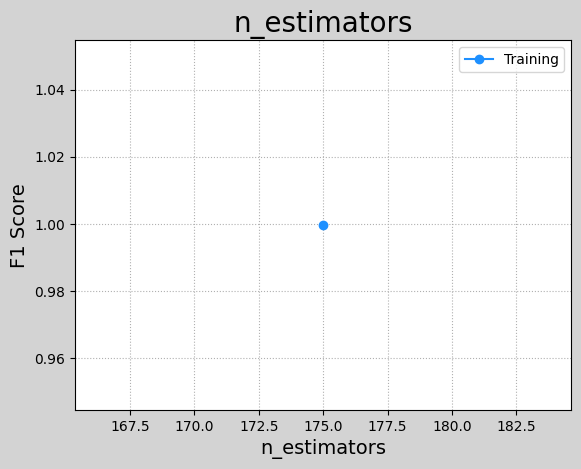

In [ ]:
# model = se.RandomForestClassifier(max_depth=6, random_state=7)
# based on n_estimators validation_curve
n_estimators = np.arange(175, 200, 50)
# train_scores, test_scores = ms.validation_curve(model, train_x, train_y, 'n_estimators', n_estimators, cv=5)
train_scores, test_scores = ms.validation_curve(estimator=model, X=train_x, y=train_y, param_name='n_estimators', param_range=n_estimators, cv=5, scoring='accuracy'
)
# print(train_scores, test_scores)
print(test_scores)

train_means1 = train_scores.mean(axis=1)
for param, score in zip(n_estimators, train_means1):
    print(param, '->', score)
mp.figure('n_estimators', facecolor='lightgray')
mp.title('n_estimators', fontsize=20)
mp.xlabel('n_estimators', fontsize=14)
mp.ylabel('F1 Score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(n_estimators, train_means1, 'o-', c='dodgerblue', label='Training')
mp.legend()
mp.show()

## 2. find the best max_depth =11

[[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.69942197 0.69942197 0.74277457 0.70144928 0.70144928]
 [0.71098266 0.70520231 0.78612717 0.75942029 0.72173913]
 [0.71098266 0.74566474 0.71965318 0.75942029 0.74492754]
 [0.71098266 0.7716763  0.71387283 0.83188406 0.7826087 ]
 [0.71965318 0.76589595 0.72254335 0.85507246 0.85507246]
 [0.71387283 0.7716763  0.76878613 0.8057971  0.87536232]
 [0.65028902 0.7716763  0.79479769 0.7884058  0.90434783]
 [0.67919075 0.77745665 0.79479769 0.82898551 0.89855072]
 [0.6300578  0.7716763  0.80924855 0.85797101 0.89275362]
 [0.6300578  0.78323699 0.8150289  0.85217391 0.88985507]
 [0.6300578  0.78901734 0.80924855 0.86086957 0.88985507]]
1 -> 0.7002315694085615
2 -> 0.7058755636198495
3 -> 0.7818320038758838
4 -> 0.8101836126711264
5 -> 0.8570616112752223
6 -> 0.9231798571238723
7 -> 0.9599244704929509
8 -> 0.9780082310210924
9 -> 0.9917526549908807
10 -> 0.9981191917986967
11 -> 0.999710669039913
12 -> 1.0


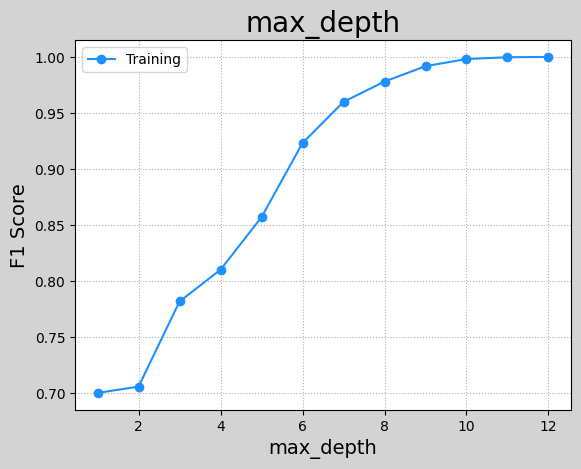

In [ ]:
# model = se.RandomForestClassifier(max_depth=6, random_state=7)
# based on max_depth validation_curve
max_depth = np.arange(1, 13, 1)
# train_scores, test_scores = ms.validation_curve(model, train_x, train_y, 'max_depth', n_estimators, cv=5)
train_scores, test_scores = ms.validation_curve(estimator=model, X=train_x, y=train_y, param_name='max_depth', param_range=max_depth, cv=5, scoring='accuracy'
)
# print(train_scores, test_scores)
print(test_scores)

train_means1 = train_scores.mean(axis=1)
for param, score in zip(max_depth, train_means1):
    print(param, '->', score)
mp.figure('max_depth', facecolor='lightgray')
mp.title('max_depth', fontsize=20)
mp.xlabel('max_depth', fontsize=14)
mp.ylabel('F1 Score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(max_depth, train_means1, 'o-', c='dodgerblue', label='Training')
mp.legend()
mp.show()

# Model Optimization using learning_curve

0.1 -> 0.7002328893356791
0.2 -> 0.7089034095668929
0.30000000000000004 -> 0.7366943118036359
0.4 -> 0.7361296808243276
0.5 -> 0.7622049091061406
0.6 -> 0.7836474826170731
0.7000000000000001 -> 0.7870989360810924
0.8 -> 0.7819033257937507
0.9 -> 0.7957962637178521


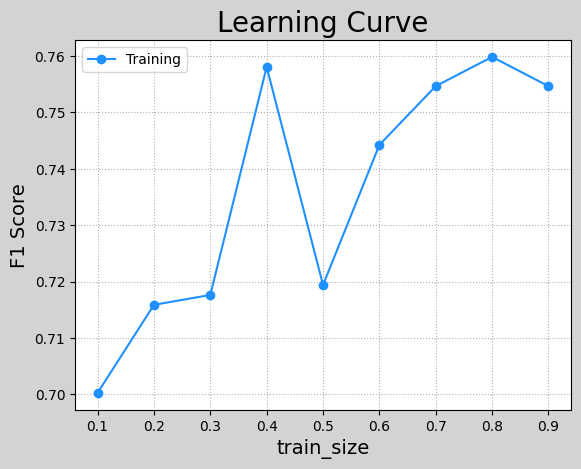

In [ ]:
# model = se.RandomForestClassifier( max_depth=9, n_estimators=200, random_state=7) train_sizes = np.linspace(0.1, 1, 10)

train_sizes = np.arange(0.1, 1.0, 0.1) # 选取多少作为训练集
tests_means = test_scores.mean(axis=1)

_, train_scores, test_scores = ms.learning_curve(
    model, train_x, train_y, train_sizes=train_sizes, cv=5)
test_means = test_scores.mean(axis=1)
for size, score in zip(train_sizes, tests_means):
    print(size, '->', score)
mp.figure('Learning Curve', facecolor='lightgray')
mp.title('Learning Curve', fontsize=20)
mp.xlabel('train_size', fontsize=14)
mp.ylabel('F1 Score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(train_sizes, test_means, 'o-', c='dodgerblue', label='Training')
mp.legend()
mp.show()